<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Sprint_5_Joes_Sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

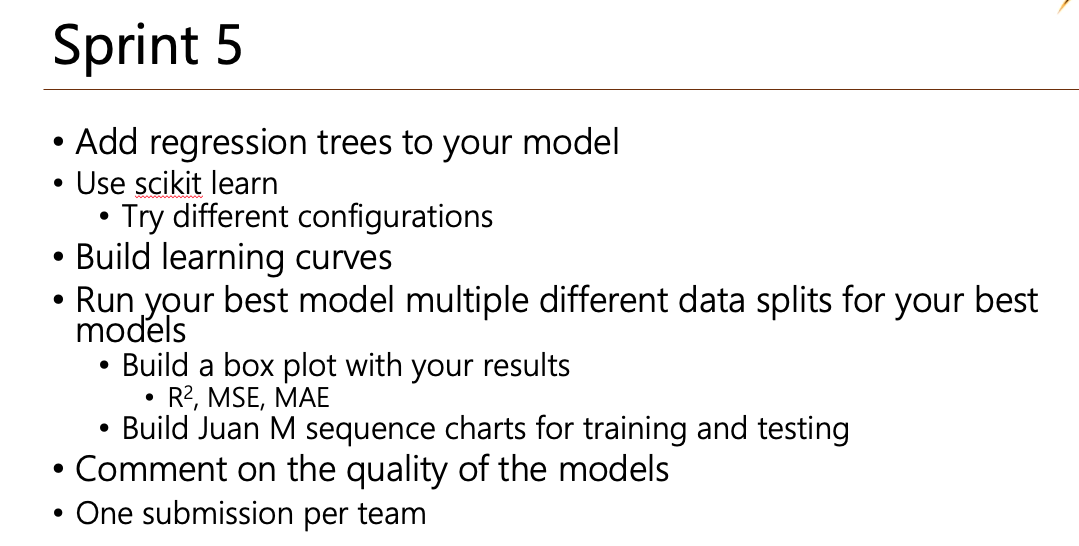

Perhaps we start with dividing hte the weeks work in to 2 parts?

Part 1 is running Porcelana data through LAsso and getting model of line , features and coeffiecnts.

Part 2 is applying Trees to Porcelana

# Libraries

In [ ]:

# Save Model Using Pickle
import pandas
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime as dt
from sklearn.metrics import mean_squared_error

# Part 1 Lasso this is just a tutorial.  

The  actual data is Porcelana, a bathroom fixture company from Columbia

### PICKLE

I am looking into Pickle first in case it is redundant or conflicts with a LAsso Regress.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [ ]:
# Libraries

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

In [ ]:
# Data

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)

In [ ]:
# Get Feature List

#X = data.loc[: ,data.columns != 'Quantity']
feature_list = dataframe.loc[: ,dataframe.columns != 'class']
#features = list(data)

In [ ]:
features = list(dataframe)
features

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [ ]:
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)


In [ ]:
# Fit the model on training set
model = LogisticRegression(max_iter=1000) # <<-- Default is 100 iterations
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
model.coef_

array([[ 0.11686363,  0.03404466, -0.01615217,  0.00299964, -0.00131783,
         0.0940856 ,  1.28726516,  0.01915212]])

In [ ]:
print('weights: ')
print(model.coef_)
print('Intercept: ')
print(model.intercept_)

weights: 
[[ 0.11686363  0.03404466 -0.01615217  0.00299964 -0.00131783  0.0940856
   1.28726516  0.01915212]]
Intercept: 
[-8.50841615]


In [ ]:
features

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [ ]:
#df = pd.DataFrame(my_array, columns = ['Column_A','Column_B','Column_C'])
df = pd.DataFrame(model.coef_ ,columns= ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'] )

In [ ]:
df

,preg,plas,pres,skin,test,mass,pedi,age
0,0.116864,0.034045,-0.016152,0.003,-0.001318,0.094086,1.287265,0.019152


In [ ]:
df.T

,0
preg,0.116864
plas,0.034045
pres,-0.016152
skin,0.003000
test,-0.001318
mass,0.094086
pedi,1.287265
age,0.019152


# Is this where pickle saves the model?

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

### ...........some time later.......

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7874015748031497


In [ ]:
loaded_model

LogisticRegression(max_iter=1000)

### Lasso on Pocerlana

# Part 2 Lasso on Porcelana

https://towardsdatascience.com/feature-selection-in-machine-learning-using-lasso-regression-7809c7c2771a

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
##from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Porcelana_OP_adelphi_2021_SCALED.csv')
data.head(2)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24


In [ ]:
#X = data.loc[: ,data.columns != 'Quantity']
feature_list = data.loc[: ,data.columns != 'Quantity']
#features = list(data)

In [ ]:
features = list(feature_list)

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['date']= data['date'].map(dt.datetime.toordinal)

In [ ]:
cols =data.columns.difference(['date'])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
# normalise only selected columns
#df[cols] = sc.fit_transform(df[cols])
#
data[cols] = sc.fit_transform(data[cols])

In [ ]:
#y = data_robust_scaled_named['diagnosis']
y = data['Quantity']

In [ ]:
X = data.loc[: ,data.columns != 'Quantity']

In [ ]:
# the tuturial from this point

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Now we have to build our model, optimize its hyperparameter and train it on the training dataset.

Since our dataset needs to be scaled in advance, we can make use of the powerful Pipeline object in scikit-learn. Our pipeline is made by a StandardScaler and the Lasso object itself.

Python scikit-learn provides a Pipeline utility to help automate machine learning workflows. Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated.

In [ ]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso()) # <<<<--- Here is where Lasson in called
])

Now we have to optimize the α hyperparameter of Lasso regression. 

For this example, we are going to test several values from 0.1 to 10 with 0.1 step. For each value, we calculate the average value of the mean squared error in a 5-folds cross-validation and select the value of α that minimizes such average performance metrics. We can use the GridSearchCV object for this purpose.


In [ ]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},#<---model__ = iterate through these 1:10 at 1/10th increments
                      cv = 5, scoring="neg_mean_squared_error",verbose=3 #how do we access these scores?
                      )


We use neg_mean_squared_error because the grid search tries to maximize the performance metrics, so we add a minus sign to minimize the mean squared error.

We can now fit the grid search.

In [ ]:
# note that above we called the Grid search SEARCH and now we call it
search.fit(X_train,y_train) #<<-- SEARCH includes modela and MODEL includes LassoS


The best value for α is:

In [ ]:
# The best value for α is:
search.best_params_

{'model__alpha': 0.2}

Now, we have to get the values of the coefficients of Lasso regression.


In [ ]:
coefficients = search.best_estimator_.named_steps['model'].coef_


In [ ]:
coefficients

The importance of a feature is the absolute value of its coefficient, so:

In [ ]:
importance = np.abs(coefficients)

In [ ]:
importance

In [ ]:
np.array(features)[importance > 0]

array(['Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4', 'IEClag_5', 'ISElag_6',
       'Gray_cement_dispatch_Factorylag_9', 'ICElag_9',
       'Housing_total_sales', 'Housing_total_initiation_SIlag_24',
       'Ordinary_creditlag_4', 'Ordinary_creditlag_6', 'working_day'],
      dtype='<U37')

In [ ]:
# df = pd.DataFrame(model.coef_ ,columns= ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'] )
Porc_Coef = pd.DataFrame(features ,coefficients)
Porc_Coef

,0
0.000000,date
0.077386,Seasonal
0.000000,Consumer_loans
0.000000,Construction_lic_unt
0.000000,Construction_lic_area
...,...
-0.000000,Treasury_loanlag_12
-0.000000,Housing_loanlag_12
-0.000000,holiday
-0.000000,sunday


reindex

rename cols

filter >0

In [ ]:
Porc_Coef['index1'] = Porc_Coef.index

In [ ]:
Porc_Coef.head()

,0,index1
0.000000,date,0.000000
0.077386,Seasonal,0.077386
0.000000,Consumer_loans,0.000000
0.000000,Construction_lic_unt,0.000000
0.000000,Construction_lic_area,0.000000


In [ ]:
Porc_Coef.reset_index(drop=True)

,0,index1
0,date,0.000000
1,Seasonal,0.077386
2,Consumer_loans,0.000000
3,Construction_lic_unt,0.000000
4,Construction_lic_area,0.000000
...,...,...
937,Treasury_loanlag_12,-0.000000
938,Housing_loanlag_12,-0.000000
939,holiday,-0.000000
940,sunday,-0.000000


In [ ]:
#df.rename({'a': 'X', 'b': 'Y'}, axis=1, inplace=True)
Porc_Coef_DF.rename

In [ ]:
Porc_Coef.tail()


,Feature,Correleation
-0.000000,Treasury_loanlag_12,-0.000000
-0.000000,Housing_loanlag_12,-0.000000
-0.000000,holiday,-0.000000
-0.000000,sunday,-0.000000
0.121657,working_day,0.121657


## Metrics: too many to choose from

https://scikit-learn.org/stable/modules/model_evaluation.html

some semplined and demo-ed

https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/

## MAE : Mean Absolut Error

MAE is a very simple metric which calculates the absolute difference between actual and predicted values.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
mean_squared_error(y_test , model.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: ignored